In [1]:
import cv2
#Libreria Numpy
import numpy as np
#Libreria de opciones de sistema
import os
#Dar importancia de mensajes
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
#Importar pandas
import pandas as pd
#Importar librerias graficas
import matplotlib.pyplot as plt
from  PIL  import Image
#Importar librerias de analisis
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
#Importar libreria de tiempo
from time import sleep
#Importo libreria para divirvir el set
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


In [2]:
#Ruta de origen de .ipynb
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
images_path =root_path+"/Clases"
#Enlistar carpetas de imagenes
class_names = os.listdir(images_path)
#Clasificar carpetas
class_names.sort()
print(class_names)

C:\Users\Usuario\Desktop\ProyectoMajo\TallerMariaJose
['CevallosJoan', 'GenesisHeredia', 'LeonardoBorja', 'LucioCarlos', 'ParragaMariaJose']


In [3]:
#copiar las bananas
#Ruta de imagnes aumentadas
banana_path= root_path+"/Clases_Dataset_Augmented"
#Iteracion por cada clase
for class_name in class_names:
    #Formacion de ruta de clase
    cur_path = images_path + "/" + class_name
    #Creacion de ruta de lementos
    elements = os.listdir(cur_path)
    #Creacion de ruta de archivos aumentados
    os.makedirs(banana_path+"/"+ class_name, exist_ok=True)
    
    for element in elements:
        print("Copying Image - {} in Clases_Dataset_Augmented/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join(banana_path+"/" + class_name, element) 
        shutil.copy(src, dst)

Copying Image - L00376416_1.jpg in Clases_Dataset_Augmented/CevallosJoan
Copying Image - L00376416_2.jpg in Clases_Dataset_Augmented/CevallosJoan
Copying Image - L00376416_3.jpg in Clases_Dataset_Augmented/CevallosJoan
Copying Image - L00392991_1.jpg in Clases_Dataset_Augmented/GenesisHeredia
Copying Image - L00392991_2.jpg in Clases_Dataset_Augmented/GenesisHeredia
Copying Image - L00392991_3.jpg in Clases_Dataset_Augmented/GenesisHeredia
Copying Image - L00393007_1.jpg in Clases_Dataset_Augmented/LeonardoBorja
Copying Image - L00393007_2.jpg in Clases_Dataset_Augmented/LeonardoBorja
Copying Image - L00393007_3.jpg in Clases_Dataset_Augmented/LeonardoBorja
Copying Image - L00393009_1.jpg in Clases_Dataset_Augmented/LucioCarlos
Copying Image - L00393009_2.jpg in Clases_Dataset_Augmented/LucioCarlos
Copying Image - L00393009_3.jpg in Clases_Dataset_Augmented/LucioCarlos
Copying Image - L00392984_1.jpg in Clases_Dataset_Augmented/ParragaMariaJose
Copying Image - L00392984_2.jpg in Clases

## Aumento de Datos

In [4]:
#Crear generador de datos de imagen
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Clase BarraganSteven

In [ ]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/CevallosJoan")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'CevallosJoan', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

## Clase LeonardoBorja

In [ ]:
#Cambiar de direccion a imagenes amarrillo y verde
os.chdir(banana_path+"/LeonardoBorja")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)   # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",  
            save_prefix= 'LeonardoBorja', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

## Clase GenesisHeredia

In [ ]:
#Cambiar de direccion a imagenes amarrillo y marron
os.chdir(banana_path+"/GenesisHeredia")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg    
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'GenesisHeredia', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break 

## Clase LucioCarlos

In [ ]:
#Cambiar de direccion a imagenes amarrillo y marron
os.chdir(banana_path+"/LucioCarlos")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg    
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break 

## Clase ParragaMariaJose

In [ ]:
#Cambiar de direccion a imagenes amarrillo y marron
os.chdir(banana_path+"/ParragaMariaJose")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg    
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'ParragaMariaJose', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break 

## Filtro NLM para eliminación de ruido de imágenes

In [ ]:
os.chdir(root_path)
images_path = root_path+"/Clases_Dataset_Augmented/"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

In [ ]:
#Lectura de cada clase de imagen
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    # Carpeta de modificados
    file_path = root_path+"/Class_Dataset_Denoised/"+ cur_label
    #Creacion de rcarpeta para archivos modificaos
    os.makedirs(file_path, exist_ok=True)
    i = 1
    #Procesamiento de cada imeagen
    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # lectura de ruta de imagen
        image = cv2.imread(file)
        # imagen filtrada
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardar imagen
        save_path = file_path
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        # conteo de procesos
        i += 1


## Eliminacion de Fondo

In [ ]:
#Ruta de imagenes filtradas
images_path = root_path+"/Class_Dataset_Denoised/"
#BUsqueda de clases
class_names = os.listdir(images_path)
class_names.sort()
#Impresion de clases
print(class_names)

In [ ]:
#Iteracion en cada clase
for class_name in class_names:
    #Ruta de clase
    cur_path = images_path + "/" + class_name
    #Nombre de calse
    cur_label = class_name
    # Carpeta de modificados
    file_path = root_path+"/Class_Dataset_RemovedBG/"+ cur_label
    #Creacion de carpeta para archivos modificaos
    os.makedirs(file_path, exist_ok=True)
    i = 1
    #Procesamiento de cada imagen
    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # Lectura de imagen
        image = cv2.imread(file)
        # remocion de fondo
        output = remove(image)
        # Guardado de imagen
        save_path = file_path
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        # Conteo de proceso
        i += 1

## Carga de Datos y Exploracion

In [2]:
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
fpath =root_path+"/Class_Dataset_RemovedBG"
#Permite Generar numeros aleatorios
random_seed = 42
#Obtengo las clases de las carpetas
categories = os.listdir(fpath)
#Defino un numero maximo de categorias
categories = categories[:20]
#Imprimo la lista de categorias y el numero
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

C:\Users\Usuario\Desktop\ProyectoMajo\TallerMariaJose
List of categories =  ['CevallosJoan', 'GenesisHeredia', 'LeonardoBorja', 'LucioCarlos', 'ParragaMariaJose'] 

No. of categories =  5


In [3]:
#Exploro las imagenes y las etiquetas de clase de cada una de las categorias
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #REDIMENSIONO las imagenes ya que 227 es la con la dimension que usa AlexNet
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

#Indico el numero de imagenes cargadas y de igual forma la etiqueta que tiene

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  140 
No. of labels loaded =  140
<class 'list'> <class 'list'>


In [4]:
#Genero un arreglo tanto de las imagenes como de las etiquetas
images = np.array(images)
labels = np.array(labels)
#Imprimo el tamaño de las imagenes y de las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (140, 227, 227, 3) 
Labels shape =  (140,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


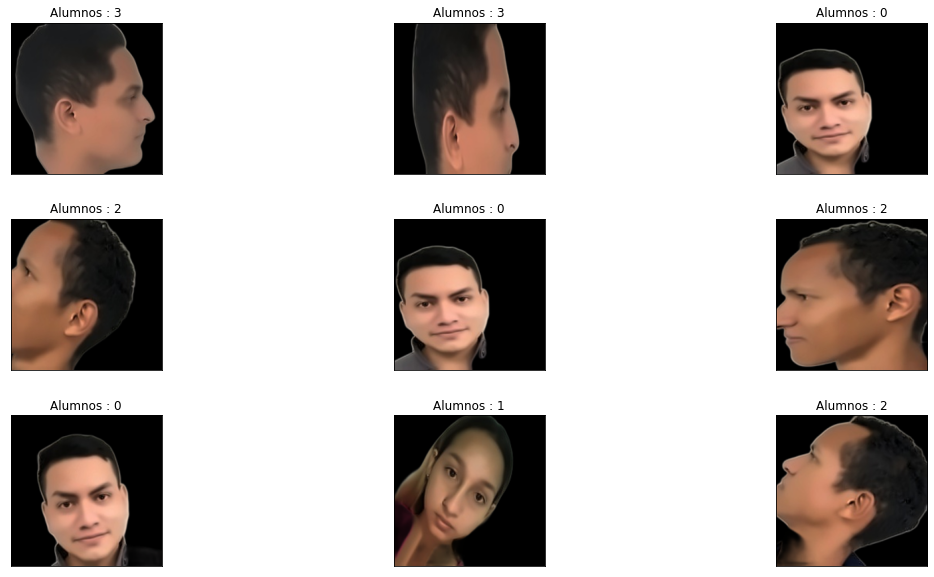

In [5]:
#Muestro imagenes randomicas en las cuales se muestre tanto la imagen con la etiqueta que tiene
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Alumnos : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [6]:
#El paso n.º 1 en la reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139]

'n' values after shuffling =  [108  67  31 119  42  12  81  69 104 109 113  56  66  19 132  78  11  27
 127 110  36 118  60   4 131  26 138  96  16  18  10 111 101  94  51  45
  82 136  65   0  55  28  40  24  93 126 112  64  44  15  89  39  22 105
  76 100  47  30  83  73   9  33  77  25  86  62  68 135  53   5  80  85
  49  35  34  97   7  43  70  84 117 123   8  13 133   3  17  38  72 114
   6

## Preparo los datos para la CNN

In [7]:
#El paso n.º 2 en la reorganización de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (140, 227, 227, 3) 
Labels shape after shuffling =  (140,)


In [8]:
#Se procede a hacer una normalizacion de las imagenes y de las etiquetas
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (140, 227, 227, 3)


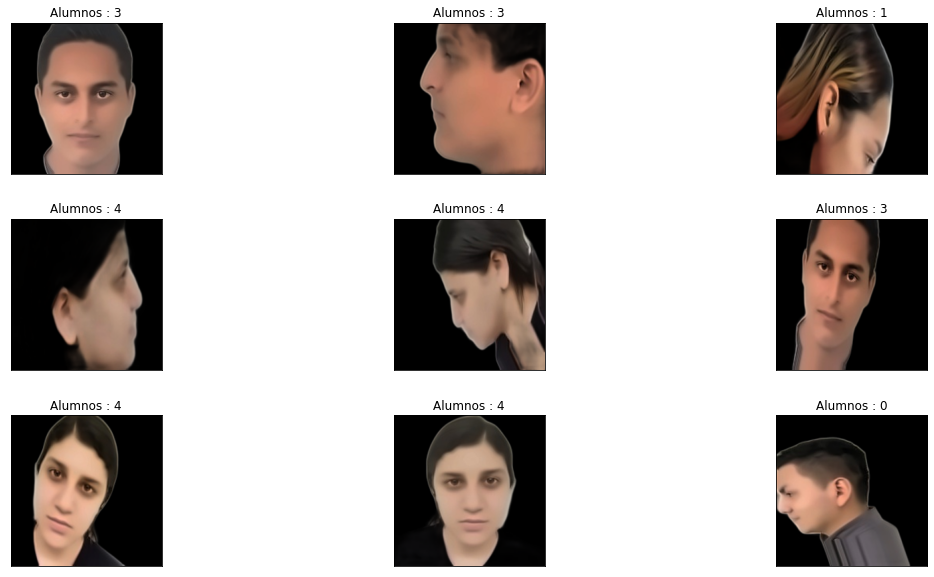

In [9]:
#Muestro imagenes random con sus etiquetas
display_rand_images(images, labels)

## Divido el Set de Entrenamiento y Prueba

In [10]:
#Divido mi set de datos en entrenamiento y prueba
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

#Muestro la dimension de cada uno de los sets
print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (112, 227, 227, 3)
train_labels shape =  (112,)

test_ds shape =  (28, 227, 227, 3)
test_labels shape =  (28,)


## Defino y entreno Modelo

In [11]:
#Diseño de la red convolucional de Alex Net en el cual se aprecia la arquitectura de las capas de convolucion de pulling
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.optimizers.SGD(lr=0.001),
    optimizer='adam',
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [13]:
history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 3.9817 - accuracy: 0.2472 - val_loss: 1.8290 - val_accuracy: 0.3043
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 4.4717 - accuracy: 0.2584 - val_loss: 3.7329 - val_accuracy: 0.2609
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 4.0753 - accuracy: 0.3258 - val_loss: 11.6963 - val_accuracy: 0.2609
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 3.1786 - accuracy: 0.4045 - val_loss: 17.4697 - val_accuracy: 0.2609
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 1.9093 - accuracy: 0.5506 - val_loss: 27.9193 - val_accuracy: 0.2609
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 2.0803 - accuracy: 0.5506 - val_loss: 37.9505 - val_accuracy: 0.2174
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 1.1923 - accuracy: 0.7079 - val_loss: 40.7604 - val_accuracy: 0.2609
Epoch 8/50
3/3 [====================

## Pruebas en el Modelo

In [14]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

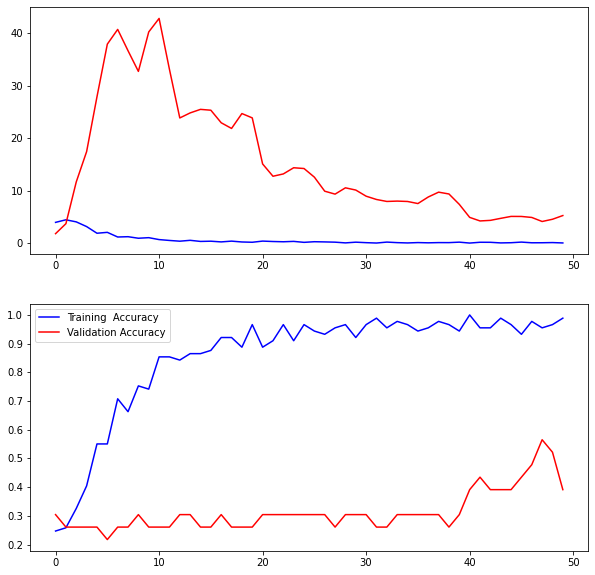

In [15]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

El significadode la primera grafica corresponde  pérdida existente en el entrenamiento y en la  validación
La segunda grafica corrsponde a la precisión del entrenamiento y la precisión de la validación

In [16]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.5652173757553101


In [17]:
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 1s 655ms/step


(28, 10)

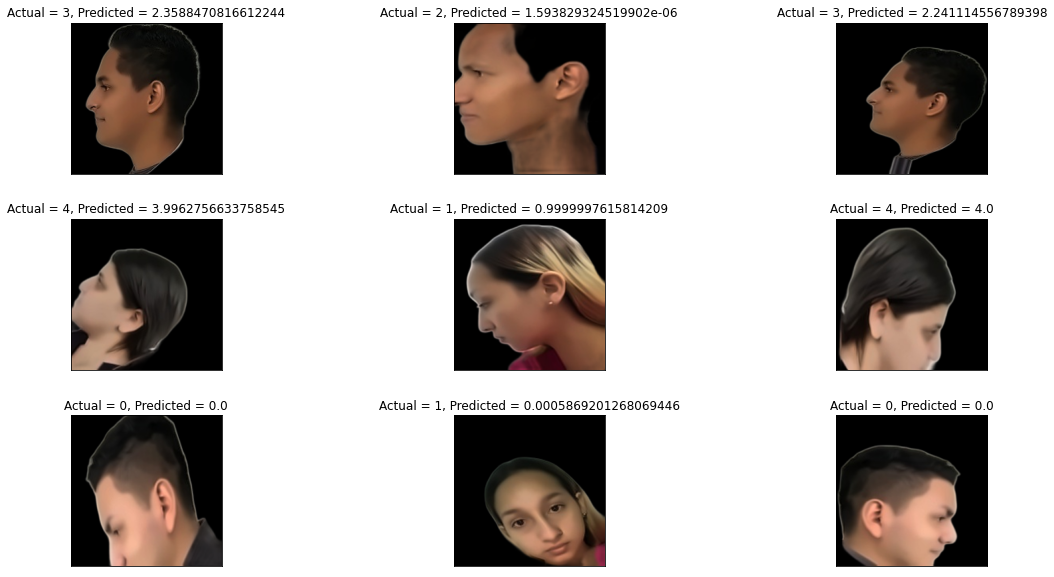

In [18]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

## Análisis 
En la presente aplicacion se ha applicado un modelo de AlexNet que es un modelo utilizado en el campo de deeplearning generalmente para el analisis y clasificacion de imagenes. Es uno de los metodos mas sencillos, para lo cual crearemos una CNN desde cero. Mediante la utilización de la API secuencial de Keras, podemos implementar capas de redes neuronales consecutivas dentro de nuestros modelos que se apilan entre sí.
Primero se ha llevado a cabo una preparacion de los datos con los cuales trabajara el modelo posteriormente se ha definido y entrenado el modelo. Y se ha llevado a cabo una prediccion del mismo en el cual se ha utilizado las metricas de accuracy, precision, recall y f1 para medir la eficiencia del modelo. En el cual se puede observar que alcanza valores de hasta 65 % lo cual se ha logrado mejorar a traves del uso del algoritmo de optimizacion en ese caso ADAM. Se puede obtener mejores resultados si se ampliara el set de entrenamiento con una mayor cantidad de instancias.